# Fake News Detection

## Importing required library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as m
import itertools
from sklearn.metrics import plot_confusion_matrix

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake["class"] = 0
df_true["class"] = 1

In [4]:
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [5]:
df_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

## Merging Fake news and true news

In [7]:
df = pd.concat([df_fake, df_true], axis =0 )
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [9]:
df = df.drop(["title", "subject","date"], axis = 1)

In [10]:
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## Randomly shuffling the df

In [11]:
df = df.sample(frac = 1)

In [12]:
df

,text,class
2499,PHILADELPHIA (Reuters) - The mayor of Allentow...,1
8523,A Grand Jury in Texas realized who the real cr...,0
7401,Conservatives love to portray Cuba as an unvit...,0
14527,WASHINGTON (Reuters) - U.S. Secretary of State...,1
5745,The announcement that Donald Trump s problemat...,0
...,...,...
4977,Donald Trump has once again showed why he will...,0
4334,The list of people GOP presidential candidate ...,0
9508,WASHINGTON (Reuters) - The U.S. Senate passed ...,1
20423,Socialist indoctrination starts in Kindergarte...,0


## Check Duplicates

In [13]:
df.drop_duplicates(inplace = True)

#New shape of the df
df.shape

(38647, 2)

## Checking Missing values


In [14]:
# Check for Missing data (NAN,na,NaN) for each column
df.isnull().sum()

text     0
class    0
dtype: int64

## Reset the index

In [15]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [16]:
df

,text,class
0,PHILADELPHIA (Reuters) - The mayor of Allentow...,1
1,A Grand Jury in Texas realized who the real cr...,0
2,Conservatives love to portray Cuba as an unvit...,0
3,WASHINGTON (Reuters) - U.S. Secretary of State...,1
4,The announcement that Donald Trump s problemat...,0
...,...,...
38642,WASHINGTON (Reuters) - Vice President Joe Bide...,1
38643,Donald Trump has once again showed why he will...,0
38644,The list of people GOP presidential candidate ...,0
38645,WASHINGTON (Reuters) - The U.S. Senate passed ...,1


Number of Fake news :  17455
Number of True news  :  21192


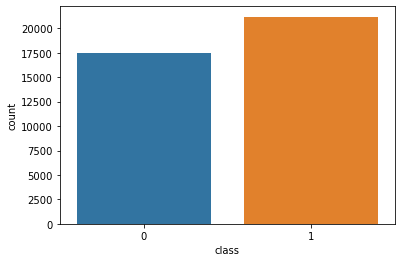

In [17]:
print("Number of Fake news : " ,df[df['class'] == 0].shape[0])
print("Number of True news  : ",df[df['class'] == 1].shape[0])


sns.countplot(x = 'class' , data = df)
plt.show()

## Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [18]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [19]:
df["text"] = df["text"].apply(wordopt)

In [20]:
df

,text,class
0,philadelphia reuters the mayor of allentow...,1
1,a grand jury in texas realized who the real cr...,0
2,conservatives love to portray cuba as an unvit...,0
3,washington reuters u s secretary of state...,1
4,the announcement that donald trump s problemat...,0
...,...,...
38642,washington reuters vice president joe bide...,1
38643,donald trump has once again showed why he will...,0
38644,the list of people gop presidential candidate ...,0
38645,washington reuters the u s senate passed ...,1


### Defining dependent and independent variable as x and y

In [21]:
x = df["text"]
y = df["class"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [23]:
print(x_train.shape)
print(y_train.shape)

(28985,)
(28985,)


In [24]:
print(x_test.shape)
print(y_test.shape)

(9662,)
(9662,)


## Converting text to vectors

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [27]:
print(type(xv_test))

<class 'scipy.sparse.csr.csr_matrix'>


In [28]:
print(xv_test.shape)

(9662, 93326)


In [29]:
xv_test

<9662x93326 sparse matrix of type '<class 'numpy.float64'>'
	with 1952703 stored elements in Compressed Sparse Row format>

## Confusion Matrix


In [30]:
def confusion_mat(Y_test, pred):
    TN = 0
    TP=0
    FN=0
    FP=0
    

    for i in range(len(Y_test)):
        
        if pred[i] == 0 and Y_test[i] == 0:
            TN=TN+1
        elif pred[i] == 1 and Y_test[i] == 1:
            TP=TP+1
        elif pred[i] == 1 and Y_test[i] == 0:
            FP=FP+1
        else:
            FN=FN+1
    
    return TN,TP,FN,FP

In [31]:
def accuracy_score(TN,TP,FN,FP):
    total = TN+TP+FN+FP
    return (TN+TP)/total


def precision_score(TN,TP,FN,FP):
    return TP/(TP+FP)


def recall_score(TN,TP,FN,FP):
    return TP/(TP+FN)


def f0pt5_score(TN,TP,FN,FP):
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    return  5*p*r/(p+r)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [34]:
pred_lr=LR.predict(xv_test)

In [35]:
accuracy = m.accuracy_score(y_test, pred_lr)
accuracy

0.9833367832746843

In [36]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_lr)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  4297
False Positive  103
False Negative  58
True Positive  5204


In [37]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.9833367832746843
PRECISION  :  0.9805916713774261
RECALL     :  0.9889775750665146
F0.5_SCORE :  2.4619169268615764


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_lr)

array([[4297,  103],
       [  58, 5204]], dtype=int64)

In [39]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4400
           1       0.98      0.99      0.98      5262

    accuracy                           0.98      9662
   macro avg       0.98      0.98      0.98      9662
weighted avg       0.98      0.98      0.98      9662



## Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [42]:
pred_NB = NB.predict(xv_test)

In [43]:
accuracy = m.accuracy_score(y_test, pred_NB)
accuracy

0.9355205961498655

In [44]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_NB)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  3977
False Positive  423
False Negative  200
True Positive  5062


In [45]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.9355205961498655
PRECISION  :  0.9228805834092981
RECALL     :  0.9619916381603952
F0.5_SCORE :  2.355075835116777


In [46]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      4400
           1       0.92      0.96      0.94      5262

    accuracy                           0.94      9662
   macro avg       0.94      0.93      0.93      9662
weighted avg       0.94      0.94      0.94      9662



## Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [49]:
pred_gbc = GBC.predict(xv_test)

In [50]:
accuracy = m.accuracy_score(y_test, pred_gbc)
accuracy

0.995342579176154

In [51]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_gbc)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  4369
False Positive  31
False Negative  14
True Positive  5248


In [52]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.995342579176154
PRECISION  :  0.9941276756961546
RECALL     :  0.9973394146712277
F0.5_SCORE :  2.4893273882933307


In [53]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4400
           1       0.99      1.00      1.00      5262

    accuracy                           1.00      9662
   macro avg       1.00      1.00      1.00      9662
weighted avg       1.00      1.00      1.00      9662



## KNN


In [61]:
from sklearn.neighbors import KNeighborsClassifier

### Finding K value

In [64]:
accuracy_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xv_train, y_train) 
    accuracy_rate.append(m.accuracy_score(y_test, knn.predict(xv_test)))

Text(0, 0.5, 'Acuuracy Rate')

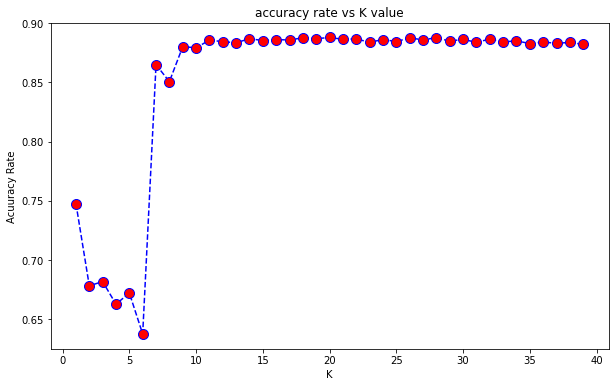

In [65]:
 plt.figure(figsize=(10,6))
 plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
 plt.title('accuracy rate vs K value')
 plt.xlabel('K')
 plt.ylabel('Acuuracy Rate')

### Since accuracy of knn is stable after n = 11 so, we will take n = 11

In [75]:
 knn = KNeighborsClassifier(n_neighbors=11)
 knn.fit(xv_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [76]:
pred_knn = knn.predict(xv_test)

In [77]:
accuracy = m.accuracy_score(y_test, pred_knn)
accuracy

0.8856344442144484

In [78]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_knn)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  3836
False Positive  564
False Negative  541
True Positive  4721


In [79]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.8856344442144484
PRECISION  :  0.893282876064333
RECALL     :  0.8971873812238692
F0.5_SCORE :  2.2380771783445526


In [80]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4400
           1       0.89      0.90      0.90      5262

    accuracy                           0.89      9662
   macro avg       0.88      0.88      0.88      9662
weighted avg       0.89      0.89      0.89      9662



## Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [56]:
pred_rfc = RFC.predict(xv_test)

In [57]:
accuracy = m.accuracy_score(y_test, pred_rfc)
accuracy

0.9812668184640861

In [58]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_rfc)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  4281
False Positive  119
False Negative  62
True Positive  5200


In [59]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))

ACCURACY   :  0.9812668184640861
PRECISION  :  0.9776273735664599
RECALL     :  0.9882174078297226
F0.5_SCORE :  2.4572346659105944


In [60]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4400
           1       0.98      0.99      0.98      5262

    accuracy                           0.98      9662
   macro avg       0.98      0.98      0.98      9662
weighted avg       0.98      0.98      0.98      9662

